In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("https://gist.githubusercontent.com/EconometricsBySimulation/5735039/raw/c77c7e9ca27f45ca989200f696f0ccc5aec4132a/heightweight.csv" ,usecols=['heightIn','weightLb'])
data.head()

,heightIn,weightLb
0,56.3,85.0
1,62.3,105.0
2,63.3,108.0
3,59.0,92.0
4,62.5,112.5


In [2]:
data.isnull().sum()

sex         0
ageYear     0
ageMonth    0
heightIn    0
weightLb    0
dtype: int64

In [6]:
from scipy import stats
stats.shapiro(data['heightIn'])


ShapiroResult(statistic=0.9962847828865051, pvalue=0.8473318219184875)

In [7]:
stats.shapiro(data['weightLb'])


ShapiroResult(statistic=0.9699857234954834, pvalue=6.59234938211739e-05)

{'whiskers': [<matplotlib.lines.Line2D at 0x13d84a09a30>,
 'caps': [<matplotlib.lines.Line2D at 0x13d84a3e4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13d84a098e0>],
 'medians': [<matplotlib.lines.Line2D at 0x13d84a3eb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x13d849ea340>],
 'means': []}

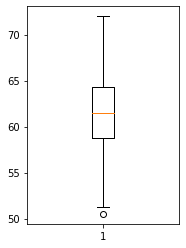

In [11]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.boxplot(data['heightIn'])


{'whiskers': [<matplotlib.lines.Line2D at 0x13d848eef40>,
 'caps': [<matplotlib.lines.Line2D at 0x13d822f7dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13d848ee850>],
 'medians': [<matplotlib.lines.Line2D at 0x13d841a48e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13d841a46a0>],
 'means': []}

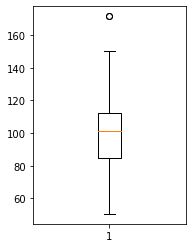

In [12]:
plt.subplot(1,2,2)
plt.boxplot(data['weightLb'])

In [4]:
data.shape

(237, 5)

In [13]:
train=data.iloc[:189]
train.shape


(189, 2)

In [14]:
test=data.iloc[189:237]
test.shape

(48, 2)

<AxesSubplot:xlabel='heightIn', ylabel='weightLb'>

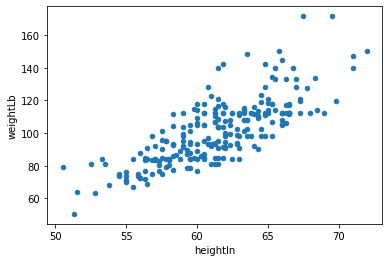

In [6]:
import matplotlib.pyplot as plt
data.plot.scatter('heightIn','weightLb')




In [16]:
from scipy.stats import pearsonr
stats.pearsonr(data.heightIn,data.weightLb)


(0.7748761066276015, 1.028685831403233e-48)

In [18]:
import statsmodels.api as sm
train_x=train.heightIn
train_y=train.weightLb
train_x=sm.add_constant(train_x)
model=sm.OLS(train_y,train_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               weightLb   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     252.2
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.61e-36
Time:                        14:54:46   Log-Likelihood:                -743.32
No. Observations:                 189   AIC:                             1491.
Df Residuals:                     187   BIC:                             1497.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -123.6766     14.137     -8.748      0.000    -151.565     -95.788
heightIn       3.6595      0.230     15.882      0.000       3.205       4.114
==============================================================================
Omnibus:                       28.024   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.777
Skew:                           0.900   Prob(JB):                     6.26e-09
Kurtosis:                       4.247   Cond. No.                         960.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='heightIn', ylabel='weightLb'>

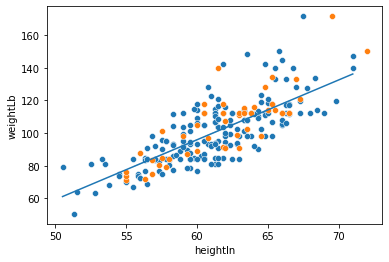

In [19]:
import seaborn as sns
sns.scatterplot(x=train.heightIn,y=train.weightLb,data=data)
sns.scatterplot(x=test.heightIn,y=test.weightLb,data=data)
predicted_y=model.predict(train_x)
sns.lineplot(x=train.heightIn,y=predicted_y)